<a href="https://colab.research.google.com/github/Gebrealief/AugWAP/blob/master/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: this problame uses artfical recurrent neural ntk called long short memory (LSM)
#               to predict the closing stock price of corporation (in our case Apple Inc.) using the past 60 day stock price.

In [3]:
# Import the labrerties
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')



/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [4]:
#Get the stock Quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-05-01')
#Show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-04-27,284.540009,279.950012,281.799988,283.170013,29271900.0,282.405548
2020-04-28,285.829987,278.200012,285.079987,278.579987,28001200.0,277.827911
2020-04-29,289.670013,283.890015,284.730011,287.730011,34320200.0,286.953247


In [5]:
#Get rows and columns of our data
df.shape

(2096, 6)

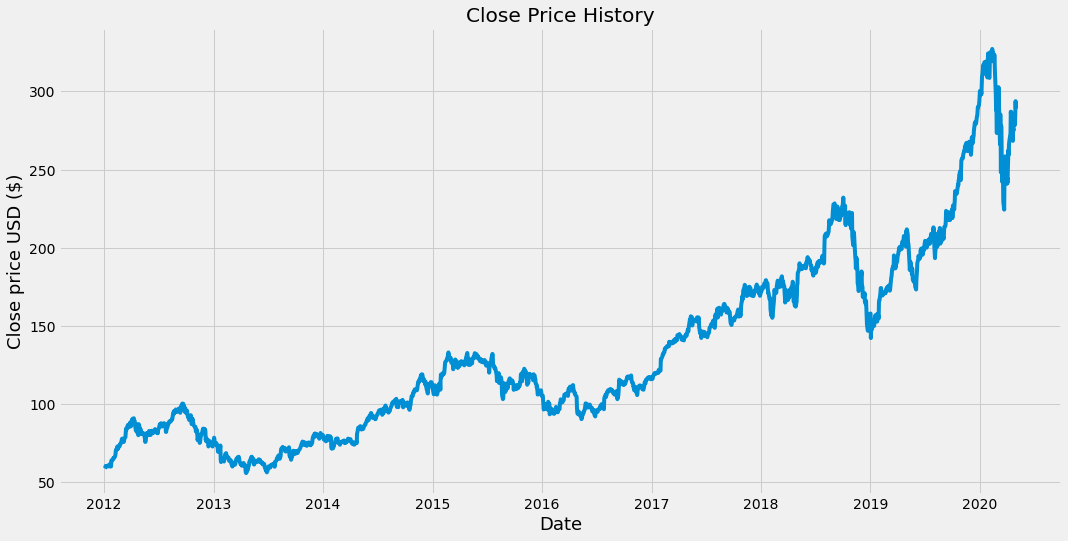

In [6]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.show()

In [7]:
# Create a new data frame with only close column
data= df.filter(['Close'])
#convert the data frame to a numpy array
dataset = data.values
#Get the number of rows to train the model on
traning_data_len = math.ceil(len(dataset)* .8)
traning_data_len

1677

In [8]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.85457426],
       [0.87693886],
       [0.85951143]])

In [9]:
#create the training data set
#create the sacled traning data set
train_data = scaled_data[0:traning_data_len , :]
#split the data in to x_train and y_train data sets
#x_train will be the independent variable and y_train will be the dependent or target data set
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
     print(x_train)
     print(y_train)
     print()



[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01

In [10]:
#convert the x_train and y_train to numpy array so we can use them for taning the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1617, 60, 1)

In [0]:
#build the LSTM model
#Build the LSTM model to have two LSTM layers with 50 neurons and two Dense layers, one with 25 neurons and the other with 1 neuron.
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer= 'adam', loss='mean_squared_error')


In [13]:
#Train model for fit is another name for train
#epochs is the number of iterations when an entier data set is pass forward and backward through a neural ntk
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1617/1617 [==============================] - 56s 34ms/step - loss: 7.1846e-04


In [0]:
#Create the testing data set
#Create new array contaning scaled values for index 1543 to 2003
test_data = scaled_data[traning_data_len - 60: , :]
#create the data set x_test and y_test
x_test = []
y_test = dataset[traning_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  


In [0]:
#Convert the data to numpy array sp that we can use in the LSTM model
x_test = np.array(x_test)

In [0]:
#Reshape the data change the two dimensional to three dimensional cus lstm is expectin g three dimensional data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [0]:
#Get the models predicted price values for X_test dat aset
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
#Get the root mean squared error (RMSE) inorder to evaluate our model 
#0 rmse means the prediction was perfect
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

1.6924825955120077

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


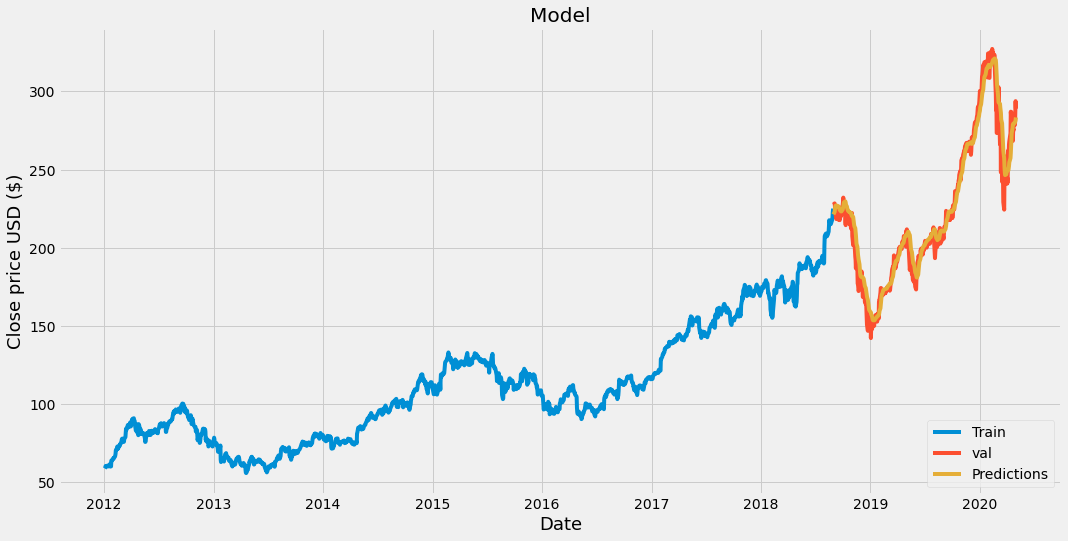

In [19]:
#Plot the data
train = data[: traning_data_len]
valid = data[traning_data_len:]
valid['Predictions'] = predictions
#visualize the data or model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'val' ,'Predictions'], loc='lower right')
plt.show()


In [20]:
#show the actual and predicted prices
valid

,Close,Predictions
Date,,
2018-08-31,227.630005,221.328537
2018-09-04,228.360001,222.891388
2018-09-05,226.869995,224.532379
2018-09-06,223.100006,225.952835
2018-09-07,221.300003,226.804092
...,...,...
2020-04-27,283.170013,279.777344
2020-04-28,278.579987,280.403198
2020-04-29,287.730011,280.712860


In [25]:
#predict the closing price for apple stock for dec 18 2019
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#create a new dataframe
new_df = apple_quote.filter(['Close'])
#get the last 60 days closing value and convert the data frame to any array
last_60_days  = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
x_test = []
#append the past 60 days
x_test.append(last_60_days_scaled)
#Convert the x_test data set to a numpy array
x_test = np.array(x_test)
#reshape the data to be three dimentional
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[274.09854]]


In [26]:
#the actual price
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])



Date
2019-12-18    279.73999
Name: Close, dtype: float64
